In [242]:
%pylab
import powerlaw
import pickle
def load_dict(name):
        with open('dict-' + name + '.pkl', 'rb') as f:
                return pickle.load(f)
fire=load_dict("fire")
import powerlaw

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


/home/giuseppe/miniconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cond']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


/home/giuseppe/miniconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/giuseppe/miniconda3/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


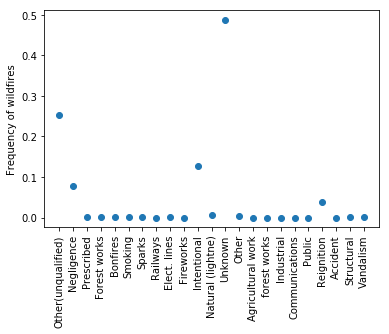

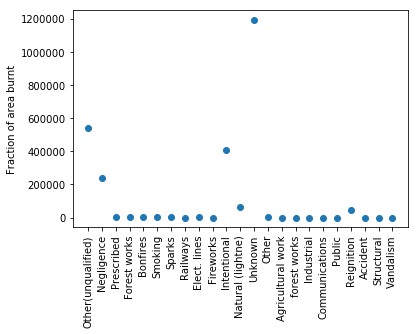

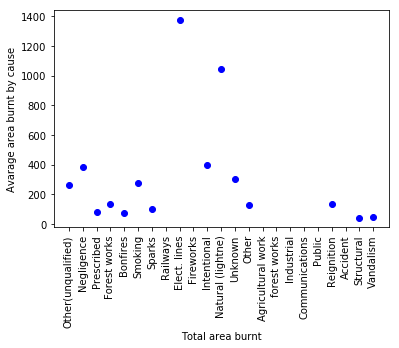

In [41]:
%matplotlib inline
a=fire["tot_burnt"]
cond=[a>39]
a=a[cond]
c=fire["cause"]
c=c[cond]
my_xticks = ["Other(unqualified)",'Negligence','Prescribed','Forest works','Bonfires',"Smoking","Sparks","Railways","Elect. lines","Fireworks","Intentional","Natural (lightne)","Unknown","Other","Agricultural work","forest works","Industrial","Communications","Public","Reignition","Accident","Structural","Vandalism"]
h,b=histogram(c,bins=arange(0,24),density=True)
plt.xticks(b[:-1], my_xticks,rotation=90)
ylabel("Frequency of wildfires")
plot(b[:-1],h,"o")
figure()
h,b=histogram(c,weights=a,bins=arange(0,24),density=False)
ylabel("Fraction of area burnt")
plt.xticks(b[:-1], my_xticks,rotation=90)
plot(b[:-1],h,"o")
figure()

for caus in arange(0,23):
    plot(caus,mean(a[c==caus]),"bo")
plt.xticks(b[:-1], my_xticks,rotation=90)
ylabel("Avarage area burnt by cause")
xlabel("Total area burnt")

In [196]:
%matplotlib 
figure(figsize=(4,3))
a=fire["tot_burnt"]
c=fire["cause"]
cond=[a>39]
a=a[cond]
c=c[cond]
unknown=(c==0)| (c==12)
others=[(unknown)|(c==1)|(c==10)|(c==11)|(c==19)]
bars=[len(a[unknown]),len(a[c==1]),len(a[c==10]),len(a[c==11]),len(a[c==19]),count_nonzero(~array(others))]
bar(arange(0,len(bars)),array(bars)/float(len(a)))
my_xticks2 = ["Unkn",'Negl',"Inte","Ligh","Reig","Oth"]
plt.xticks(arange(0,len(bars)), my_xticks2,rotation=90,fontsize=12.5)
ylabel("$N_F$ by cause/$N_F$",fontsize=13)
xlabel("Causes",fontsize=13)
tight_layout()
ylim(0,0.88)
for  i,p in enumerate(array(bars)/float(len(a))):
    text(i-0.5, p+0.05, str(round(p,2)))

Using matplotlib backend: Qt5Agg


In [202]:
array(bars)

array([5941,  632, 1014,   59,  313,   60])

[]

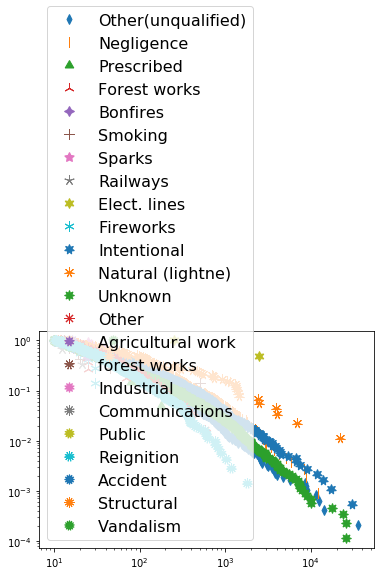

In [3]:
%matplotlib inline
figure()
markers = [(int(2+i/2), int(1+i%2), 0) for i in arange(23)]
a=fire["tot_burnt"]
cond=[a>10]
a=a[cond]
c=fire["cause"]
c=c[cond]
#plot(sort(a),1-arange(0,len(a))/len(a),"--")
for caus in arange(0,23):
    plot(sort(a[c==caus]),1-arange(0,len(a[c==caus]))/len(a[c==caus]),marker=markers[caus],ms=10,ls='')
#fit=powerlaw.Fit(a[c==11],xmin_distance="Asquare")
#print("alpha due to natural causes is"+str(fit.alpha))
legend(my_xticks,loc="lower left",fontsize=16)
loglog()

In [151]:
#figure(figsize=(4,3))
a=fire["tot_burnt"]
c=fire["cause"]
xmin=39
cond=[a>xmin]
a=a[cond]
c=c[cond]
unknown=(c==0)|(c==12)
plot(sort(a[unknown]),1-arange(0,len(a[unknown]))/len(a[unknown]),"x",label="Unkn")
alpha=MLE(a[unknown],xmin)
t=logspace(log10(min(a[unknown])),log10(max(a[unknown])),20)

plot(sort(a[c==1]),1-arange(0,len(a[c==1]))/len(a[c==1]),"wo",mew=1,mec="orange",label="Negl")
plot(sort(a[c==10]),1-arange(0,len(a[c==10]))/len(a[c==10]),"g.",label="Inte")
plot(sort(a[c==11]),1-arange(0,len(a[c==11]))/len(a[c==11]),"w^",mew=1,mec="purple",label="Ligh")
plot(sort(a[c==19]),1-arange(0,len(a[c==19]))/len(a[c==19]),"w<",mew=1,mec="magenta",label="Reig")
legend(fontsize=12.5,frameon=False,ncol=1)
xlabel("Total area burnt $A_F$  (ha)",fontsize=12.5)
ylabel("Norm. cumulative, $\\hat{F}(A_F)$",fontsize=12.5)
tight_layout()
loglog()
xlim(10)

def MLE(x,xmin):
    x=x[x>=xmin]
    return 1+len(x)*sum(log(x/(xmin)))**-1



In [213]:
def func(x,a,k):
    return a*x**(-k)
def fitting(x,y):
        k,a_log=polyfit(log(x),log(y),1)
        ybar=mean(log(y))
        yhat=a_log+k*log(x)
        ssreg = numpy.sum((yhat-ybar)**2)
        sstot = numpy.sum((log(y) - ybar)**2)
        plot(x,func(x,exp(a_log),-k),"r--", label='LS fit')
        print("A= "+str(exp(a_log))+" k= "+str(k))
        rsquared = ssreg / sstot
        return exp(a_log),k,rsquared

In [257]:
%matplotlib 
a=fire["tot_burnt"]
c=fire["cause"]
xmin=39
cond=[a>xmin]
a=a[cond]
c=c[cond]
unknown=(c==0)| (c==12)

h,b=histogram(a[unknown],bins=logspace(log10(min(a[unknown])),log10(max(a[unknown])+10),21),density=True)
x=(b[:-1]+b[1:])/2.
plot(x,h,"x",label="Unknown")
alpha=MLE(a[unknown],xmin)
plot(x,((alpha-1)*xmin**(alpha-1))*x**-alpha,"-.",label="MLE fit")
intercept,alpha_ls,rsquared=fitting(x,h)
xlabel("Area $A_F$ (ha)",size=12)
ylabel("Non-cumulative frequency,\n $\\hat{f}(A_F)$ (ha)$^{-1}$ ",size=12)
loglog()
legend(loc="upper right",fontsize=12,frameon=False)
A=(alpha-1)/xmin**(1-alpha)
text(5e1,2e-8,"LS: $f(A_F)="+str("%.2g"% intercept)+"A_F^{"+str(round(alpha_ls,2))+"}$, $r^2=$"+str(round(rsquared,2)))
text(5e1,1e-7,"MLE: $f(A_F)="+str("%.2g"%A)+"A_F^{"+str(round(-alpha,2))+"}$")
tight_layout()

fit=powerlaw.Fit(a[unknown],xmin=xmin)
print("unknown fires, alpha= "+str(fit.alpha)+" sigma= "+str(fit.sigma)+" KS= "+str(fit.D))


################## starts intentional
figure(figsize(4,3))
h,b=histogram(a[c==10],bins=logspace(log10(min(a[c==10])),log10(max(a[c==10])+10),21),density=True)
x=(b[:-1]+b[1:])/2.
plot(x,h,"g.",label="Intent.")
alpha=MLE(a[c==10],xmin)
plot(x,((alpha-1)*xmin**(alpha-1))*x**-alpha,"-.",label="MLE fit")
xlabel("Area $A_F$ (ha)",size=12)
ylabel("Non-cumulative frequency,\n $\\hat{f}(A_F)$ (ha)$^{-1}$ ",size=12)
intercept,alpha_ls,rsquared=fitting(x,h)
A=(alpha-1)/xmin**(1-alpha)
text(5e1,1e-7,"LS: $f(A_F)="+str("%.2g"% intercept)+"A_F^{"+str(round(alpha_ls,2))+"}$, $r^2=$"+str(round(rsquared,2)),fontsize=10.5)
text(5e1,5e-7,"MLE: $f(A_F)="+str("%.2g"%A)+"A_F^{"+str(round(-alpha,2))+"}$",fontsize=10.5)

tight_layout()
fit=powerlaw.Fit(a[c==10],xmin=xmin)
print("intentional fires, alpha= "+str(fit.alpha)+" sigma= "+str(fit.sigma)+" KS= "+str(fit.D))


legend(fontsize=12,frameon=False)
loglog()
def MLE(x,xmin):
    x=x[x>=xmin]
    return 1+len(x)*sum(log(x/(xmin)))**-1

'''h,b=histogram(a[c==1],bins=logspace(log10(min(a[c==1])),log10(max(a[c==1])+10),21),density=True)
x=(b[:-1]+b[1:])/2.
plot(x,h,"o",label="Negligence")
figure(figsize(4,3))

h,b=histogram(a[c==11],bins=logspace(log10(min(a[c==11])),log10(max(a[c==11])+10),21),density=True)
x=(b[:-1]+b[1:])/2.
plot(x,h,"^",label="Natural")

figure(figsize(4,3))
h,b=histogram(a[c==19],bins=logspace(log10(min(a[c==19])),log10(max(a[c==19])+10),21),density=True)
x=(b[:-1]+b[1:])/2.
plot(x,h,"<",label="Reignition")
'''

Using matplotlib backend: Qt5Agg
A= 80.6016658689 k= -2.09942050281
unknown fires, alpha= 1.84814276171 sigma= 0.0110037112089 KS= 0.0529954763419
A= 30.2374507046 k= -1.90949595416
intentional fires, alpha= 1.73568268217 sigma= 0.0231031690246 KS= 0.0572004939996


'h,b=histogram(a[c==1],bins=logspace(log10(min(a[c==1])),log10(max(a[c==1])+10),21),density=True)\nx=(b[:-1]+b[1:])/2.\nplot(x,h,"o",label="Negligence")\nfigure(figsize(4,3))\n\nh,b=histogram(a[c==11],bins=logspace(log10(min(a[c==11])),log10(max(a[c==11])+10),21),density=True)\nx=(b[:-1]+b[1:])/2.\nplot(x,h,"^",label="Natural")\n\nfigure(figsize(4,3))\nh,b=histogram(a[c==19],bins=logspace(log10(min(a[c==19])),log10(max(a[c==19])+10),21),density=True)\nx=(b[:-1]+b[1:])/2.\nplot(x,h,"<",label="Reignition")\n'

In [251]:
intercept

30.237450704611312

In [59]:
count_nonzero(~array(others))

60